# Fraud Detection Using Machine Learning
Fraud is one of the major problems we have mainly in Banking, Life Insurance, Health Insurance, and many more. These major scams depend on the person trying to sell you the fake product or service, if you are mature enough to report what is wrong, you will never enter into any fraudulent transactions. But one such fraud that is on the rise these days is payment fraud. In this article, I will try to find a solution to detect fraud using machine learning.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
df = pd.read_csv('payment_fraud.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [16]:
df.shape

(39221, 6)

In [17]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [19]:
df['paymentMethod'].value_counts()

paymentMethod
creditcard     28004
paypal          9303
storecredit     1914
Name: count, dtype: int64

In [20]:
df['paymentMethodAgeDays'].max()

1999.58055556

Fortunately, the data set I'm using is very well organized with no missing values in it, and I don't find any scope for data cleaning in it. So without wasting any time, I'm going to dive into building our machine learning model.

In [25]:
pm_dummies = pd.get_dummies(df['paymentMethod']).astype('int')
pm_dummies.head()

,creditcard,paypal,storecredit
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [26]:
df = pd.concat([df, pm_dummies], axis=1)
df.drop(columns='paymentMethod', inplace=True)
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,creditcard,paypal,storecredit
0,29,1,4.745402,28.204861,0,0,1,0
1,725,1,4.742303,0.000000,0,0,0,1
2,845,1,4.921318,0.000000,0,1,0,0
3,503,1,4.886641,0.000000,0,1,0,0
4,2000,1,5.040929,0.000000,0,1,0,0


In [27]:
X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)*100

print(f'Accuracy: {accuracy: .2f} %')

Accuracy:  100.00 %


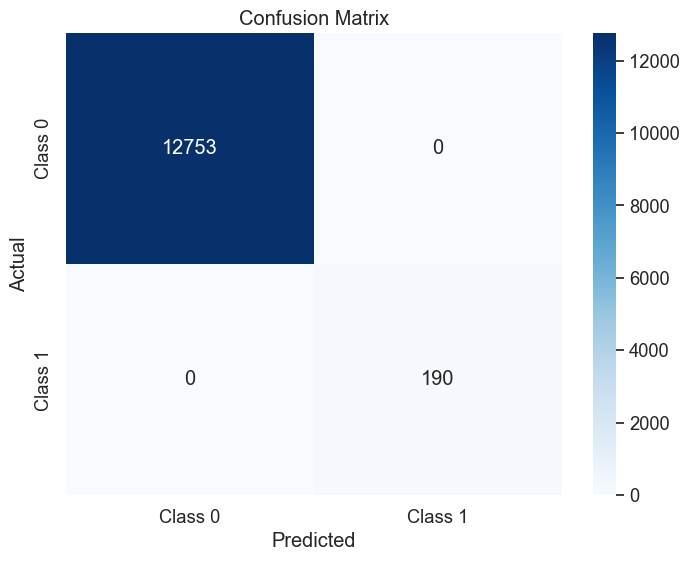

In [34]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Class 0", "Class 1"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

Well, that's a perfect model I guess. When was the last time we got an accuracy of 100% and a confusion matrix looks like that!!